# NLDAS2 Forcing

In [1]:
from __future__ import annotations

from pathlib import Path

import pynldas2 as nldas
from pygeohydro import WBD

The NLDAS2 database provides forcing data at 1/8th-degree grid spacing and range from 01 Jan 1979 to present. Let's take a look at NLDAS2 grid mask that includes land, water, soil, and vegetation masks:

In [2]:
grid = nldas.get_grid_mask()
grid

<xarray.Dataset> Size: 2MB
Dimensions:      (lon: 464, lat: 224, time: 1, bnds: 2)
Coordinates:
  * lon          (lon) float32 2kB -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat          (lat) float32 896B 25.06 25.19 25.31 ... 52.69 52.81 52.94
  * time         (time) datetime64[ns] 8B 2000-01-01
    spatial_ref  int64 8B 0
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 16B ...
    NLDAS_mask   (time, lat, lon) float32 416kB ...
    CONUS_mask   (time, lat, lon) float32 416kB ...
    NLDAS_veg    (time, lat, lon) float32 416kB ...
    NLDAS_soil   (time, lat, lon) float32 416kB ...
Attributes: (12/13)
    missing_value:          -9999.0
    time_definition:        constant
    title:                  NLDAS masks and predominant vegetation/soil
    institution:            NASA GSFC
    history:                created on date: Fri Mar  8 15:58:50 2019
    references:             Mitchell_etal_JGR_2004; Xia_etal_JGR_2012
    ...                     ...
    website:                https://ldas.gsfc.nasa.gov/nldas/
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

For example, let's plot the vegetation mask.

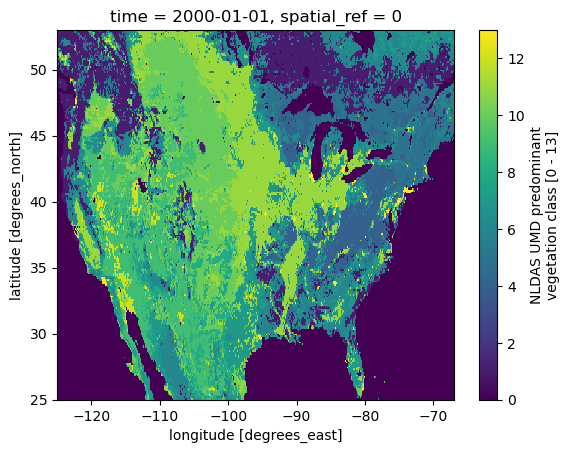

In [3]:
ax = grid.NLDAS_veg.plot()
ax.figure.savefig(Path("_static", "nldas_grid.png"), facecolor="w", bbox_inches="tight")

Next, we use [PyGeoHydro](https://github.com/hyriver/pygeohydro) to get the geometry of a HUC8 with ID of 1306003:

In [4]:
huc8 = WBD("huc8")
geometry = huc8.byids("huc8", "13060003").geometry.iloc[0]

[PyNLDAS2](https://github.com/hyriver/pynldas2) allows us to get the data for a list of coordinates using `pynldas2.get_bycoords` or for a region as gridded data using `pynldas2.get_bygeom`. Here, we use the latter. Note that if we don't pass any variables, all variables will be downloaded. Additionally, we can pass ``snow=True`` to separate snow portion of precipitation using temperature. PyNLDAS2 provides access to NLDAS2 data from two sources: `grib` and `netcdf`. They are mostly similar so if for some reason one of the sources is not temporarly available, you can use the other one. The default source is `grib`.

In [5]:
clm = nldas.get_bygeom(geometry, "2010-01-08", "2010-01-08", 4326, variables="prcp", snow=True)

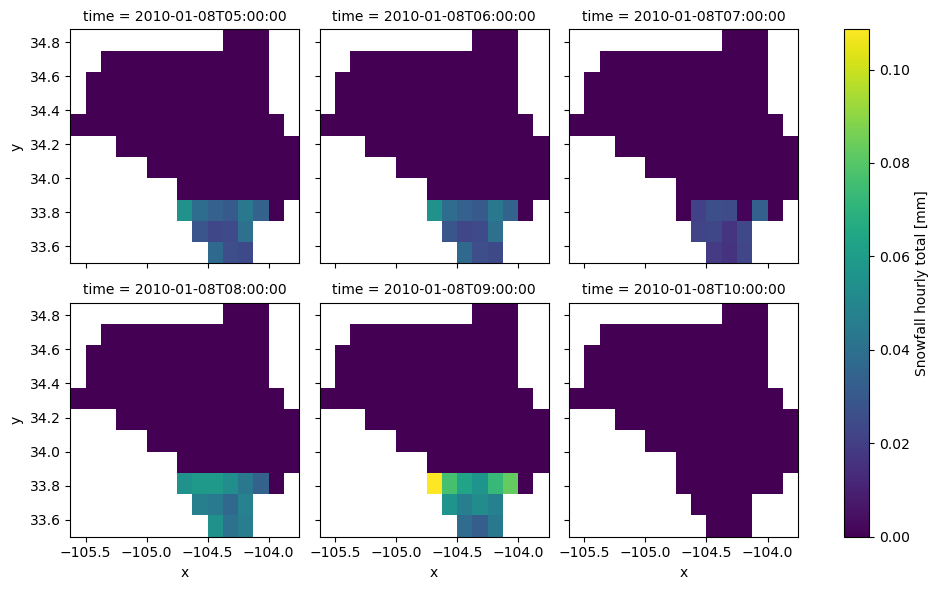

In [6]:
ax = clm.snow.sel(time=slice("2010-01-08T05:00:00", "2010-01-08T010:00:00")).plot(
    col="time", col_wrap=3
)
ax.fig.savefig(Path("_static", "nldas_snow.png"), facecolor="w", bbox_inches="tight")